# Module 02 Final Exercise

This dataset is from the comprehensive, multi-source cyber-security events from Los Alamos National Laboratory. This data set represents 58 consecutive days of de-identified event data collected from five sources within Los Alamos National Laboratory’s corporate, internal computer network.

The data sources include Windows-based authentication events from both individual computers and centralized Active Directory domain controller servers; process start and stop events from individual Windows computers; Domain Name Service (DNS) lookups as collected on internal DNS servers; network flow data as collected on at several key router locations; and a set of well-defined red teaming events that present bad behavior within the 58 days. In total, the data set is approximately 12 gigabytes compressed across the five data elements and presents 1,648,275,307 events in total for 12,425 users, 17,684 computers, and 62,974 processes.

Specific users that are well known system related (SYSTEM, Local Service) were not de-identified though any well-known administrators account were still de-identified. In the network flow data, well-known ports (e.g. 80, 443, etc) were not de-identified. All other users, computers, process, ports, times, and other details were de-identified as a unified set across all the data elements (e.g. U1 is the same U1 in all of the data). The specific timeframe used is not disclosed for security purposes. In addition, no data that allows association outside of LANL’s network is included. All data starts with a time epoch of 1 using a time resolution of 1 second. In the authentication data, failed authentication events are only included for users that had a successful authentication event somewhere within the data set.

This data presents specific events taken from the authentication data that present known redteam compromise events. These may be used as ground truth of bad behavior that is different from normal user and computer activity. Each event is on a separate line in the form of "time,user@domain,source computer,destination computer" and presents a compromise event at the given time. The values are comma delimited.

Use all the knowledge you have learned, or previously developed to determine a subset of users that are seen to be acting as intruders.

(Hint: First decide what story to tell or what problem to solve) Feel free to check out: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html and other libraries (matplotlib, seaborn, plotly) to explore other data visualization libraries.

In [7]:
import pandas as pd
df = pd.read_csv('data/redteam.txt')

In [18]:
df['user@domain'].head()

0     U620@DOM1
1     U748@DOM1
2     U748@DOM1
3    U6115@DOM1
4     U636@DOM1
Name: user@domain, dtype: object

In [8]:
def user_split(item):
    return item.split('@')[0]

In [9]:
def domain_split(item):
    return item.split('@')[1]

In [10]:
df.columns

Index(['time', 'user@domain', 'source', 'destination'], dtype='object')

In [11]:
df['user'] = df['user@domain'].apply(user_split)

In [12]:
df['domain'] = df['user@domain'].apply(domain_split)

In [13]:
df.columns

Index(['time', 'user@domain', 'source', 'destination', 'user', 'domain'], dtype='object')

<AxesSubplot:>

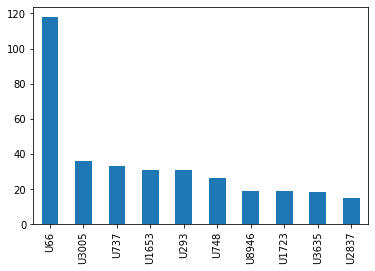

In [16]:
df['user'].value_counts().nlargest(10).plot(kind='bar')

<AxesSubplot:>

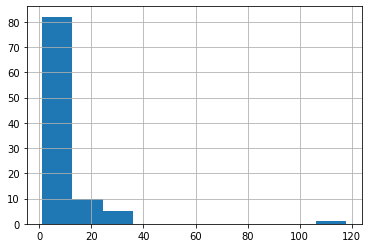

In [17]:
df['user'].value_counts().hist()

In [19]:
df.columns

Index(['time', 'user@domain', 'source', 'destination', 'user', 'domain'], dtype='object')

In [20]:
df['source'].value_counts()

C17693    701
C22409     26
C19932     19
C18025      3
Name: source, dtype: int64

<AxesSubplot:>

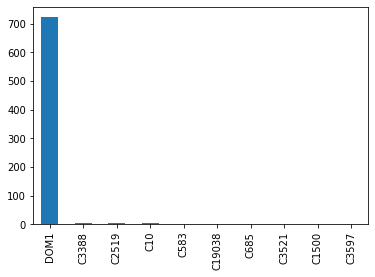

In [21]:
df['domain'].value_counts().nlargest(10).plot(kind='bar')

<AxesSubplot:xlabel='user', ylabel='domain'>

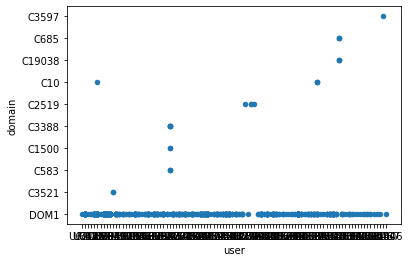

In [23]:
df.plot.scatter(x='user', y='domain')